#### 1. Import Library and Define Function 

In [20]:
import pandas as pd
from fancyimpute import SoftImpute,KNN 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, Imputer,StandardScaler,Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.layers import Dense, Dropout
%matplotlib inline

In [3]:
def plot_accuracy_against_epoch(model):
    plt.plot(model.history['acc'])
    plt.plot(model.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.ylim(0,1)
    plt.show()
def plot_loss_against_epoch(model):
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.ylim(0,1)
    plt.show()

#### 2. Load Dataset

In [4]:
dataset_train=pd.read_csv("C:/Users/Wahyu Nainggolan/Documents/ronde 2/ronde_2/Data/cs-training.csv").drop("Unnamed: 0",axis=1)
dataset_test=pd.read_csv("C:/Users/Wahyu Nainggolan/Documents/ronde 2/ronde_2/Data/cs-test.csv").drop("Unnamed: 0",axis=1)

#### 3. Description of the Dataset 

In the dataset there are 150000 data points on the Training and 101503 data points on the Test with 12 attributes, namely:
 - SeriousDlqin2yrs, Person experienced 90 days past due delinquency or worse (Y/N)
 - RevolvingUtilizationOfUnsecuredLines, Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits(percentage)
 - Age, Age of borrower in years(integer)
 - NumberOfTime30-59DaysPastDueNotWorse, Number of times borrower has been 30-59 days past due but no worse in the last 2 years(integer)
 - DebtRatio, Monthly debt payments, alimony,living costs divided by monthy gross income(percentage)
 - MonthlyIncome, Monthly income(real)
 - NumberOfOpenCreditLinesAndLoans, Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)(integer)
 - NumberOfTimes90DaysLate, Number of times borrower has been 90 days or more past due(integer)
 - NumberRealEstateLoansOrLines, Number of mortgage and real estate loans including home equity lines of credit(integer)
 - NumberOfTime60-89DaysPastDueNotWorse, Number of times borrower has been 60-89 days past due but no worse in the last 2 years(integer)
 - NumberOfDependents, Number of dependents in family excluding themselves (spouse, children etc.) (integer)


In [29]:
print("Dataset Size :")
print("Training Size : ",dataset_train.shape)
print("Test Size : ",dataset_test.shape)


Dataset Size :
Training Size :  (150000, 11)
Test Size :  (101503, 11)


In [14]:
print("Tenth first Training Data :")
dataset_train.head(10)


Tenth first Training Data :


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [15]:
print("Tenth first Test Data :")
dataset_test.head(10)

Tenth first Test Data :


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
5,NaN,0.509791,63,0,0.342429,4140.0,4,0,0,0,1.0
6,NaN,0.587778,50,0,1048.000000,0.0,5,0,0,0,3.0
7,NaN,0.046149,79,1,0.369170,3301.0,8,0,1,0,1.0
8,NaN,0.013527,68,0,2024.000000,NaN,4,0,1,0,0.0
9,NaN,1.000000,23,98,0.000000,0.0,0,98,0,98,0.0


In [16]:
dataset_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


#### 4. Visualization Data 
4.1. Perbandingan Y/N (0 dan 1) pada attribut SeriousDlqin2yrs adalah sebagai berikut :

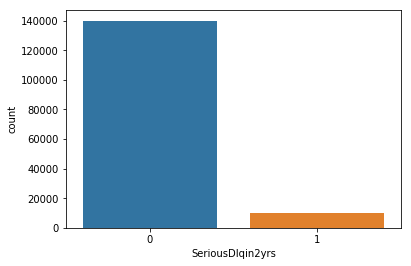

In [17]:
sns.countplot(dataset_train['SeriousDlqin2yrs'],label="Mean")  

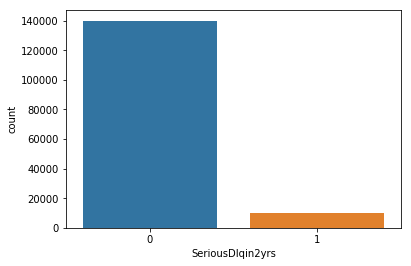

In [107]:
sns.countplot(dataset_train['SeriousDlqin2yrs'],label="Count")

Grafik diatas merupakan perbandingan nilai yang ada pada attribut SeriousDlqin2yrs yaitu antara nilai 0 dan 1. Dari grafik diatas dapat dilihat bahwa nilai 0 lebih dominan dari pada nilai 1. Dalam melakukan prediksi dataset seperti ini tidaklah baik, karena dataset ini berpotensi menghasilkan clasifier yang lebih mengutamakan nilai yang lebih dominan.   


4.2. Grafik perbandingan antara attribut SeriousDlqin2yrs dengan DebtRatio :

C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


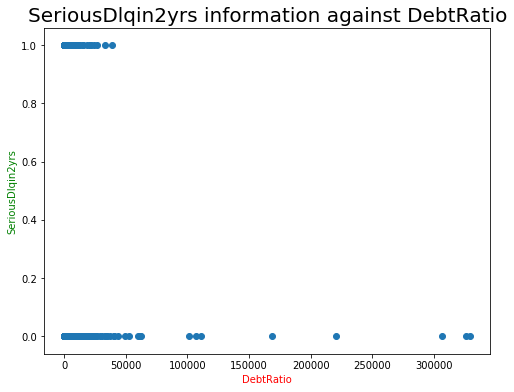

In [11]:
# Your code goes here
plt.figure(figsize=(8,6))

plt.scatter(dataset_train['DebtRatio'],dataset_train['SeriousDlqin2yrs'],marker='o')
ax = plt.subplot(111)
plt.ylabel('SeriousDlqin2yrs')
ax.yaxis.label.set_color('green')
plt.xlabel('DebtRatio')
ax.xaxis.label.set_color('red')
plt.title('SeriousDlqin2yrs information against DebtRatio', fontsize=20);
plt.show()

4.3. Visualise the distribution of the SeriousDlqin2yrs.

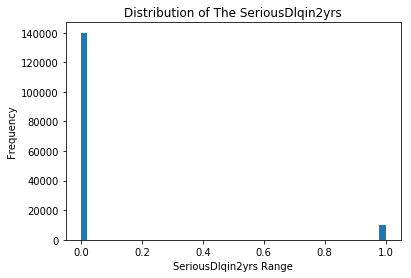

In [12]:
plt.hist(dataset_train['SeriousDlqin2yrs'], bins=50)
plt.title("Distribution of The SeriousDlqin2yrs")
plt.xlabel("SeriousDlqin2yrs Range")
plt.ylabel("Frequency")
plt.show()

4.4.

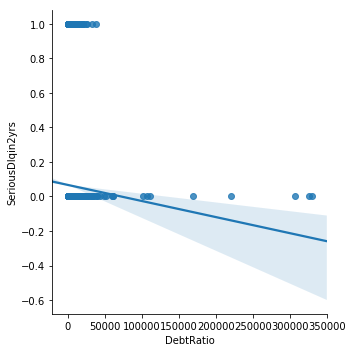

In [13]:
plt.figure(figsize=(10,13))
sns.lmplot("DebtRatio", "SeriousDlqin2yrs", data=dataset_train)
plt.show()

4.5. Visualisasi hubungan setiap data

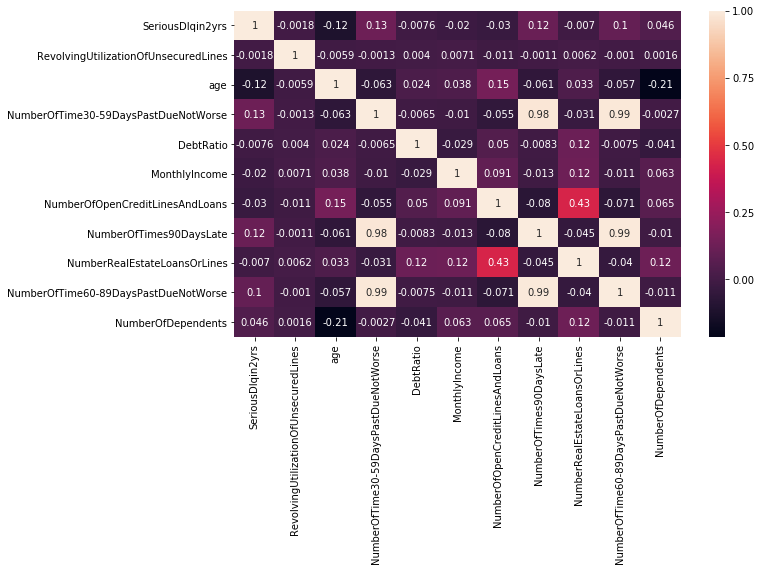

In [15]:
corr = dataset_train.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2g")

4.6.

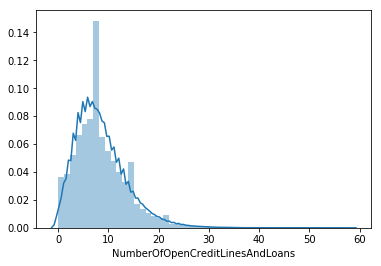

In [15]:
sns.distplot(dataset_train.NumberOfOpenCreditLinesAndLoans)

#### 5. Preprocessing Dataset 

5.1. Missing Value 

In [5]:
null_counts_data_train = dataset_train.isnull().sum()
print("Number of null values in each column in data train:\n{}".format(null_counts_data_train))

Number of null values in each column in data train:
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [6]:
print("----------------------Solve Missing Value Data Train-----------------------------------------")
dataset_train.iloc[:,1:] = SoftImpute().complete(dataset_train.iloc[:,1:])
dataset_train = dataset_train.round({'age': 0, 'NumberOfTime30-59DaysPastDueNotWorse': 0, 'NumberOfOpenCreditLinesAndLoans':0,
                            'NumberOfTimes90DaysLate':0, 'NumberRealEstateLoansOrLines':0, 'NumberOfTime60-89DaysPastDueNotWorse':0,
                            'NumberOfDependents':0}) 

----------------------Solve Missing Value Data Train-----------------------------------------
[SoftImpute] Max Singular Value of X_init = 5498797.118077
[SoftImpute] Iter 1: observed MAE=22.144330 rank=2


C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\fancyimpute\soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold


[SoftImpute] Iter 2: observed MAE=22.144389 rank=2
[SoftImpute] Iter 3: observed MAE=22.144398 rank=2
[SoftImpute] Iter 4: observed MAE=22.144402 rank=2
[SoftImpute] Iter 5: observed MAE=22.144406 rank=2
[SoftImpute] Iter 6: observed MAE=22.144409 rank=2
[SoftImpute] Iter 7: observed MAE=22.144413 rank=2
[SoftImpute] Iter 8: observed MAE=22.144416 rank=2
[SoftImpute] Iter 9: observed MAE=22.144420 rank=2
[SoftImpute] Iter 10: observed MAE=22.144423 rank=2
[SoftImpute] Iter 11: observed MAE=22.144426 rank=2
[SoftImpute] Iter 12: observed MAE=22.144429 rank=2
[SoftImpute] Iter 13: observed MAE=22.144432 rank=2
[SoftImpute] Iter 14: observed MAE=22.144435 rank=2
[SoftImpute] Iter 15: observed MAE=22.144438 rank=2
[SoftImpute] Iter 16: observed MAE=22.144441 rank=2
[SoftImpute] Iter 17: observed MAE=22.144444 rank=2
[SoftImpute] Iter 18: observed MAE=22.144447 rank=2
[SoftImpute] Iter 19: observed MAE=22.144450 rank=2
[SoftImpute] Iter 20: observed MAE=22.144452 rank=2
[SoftImpute] Iter 21

In [7]:
print("10 Data Train pertama tanpa missing value:  ")
dataset_train.head(10)

10 Data Train pertama tanpa missing value:  


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.000000,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.000000,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.000000,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.000000,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.000000,7.0,0.0,1.0,0.0,0.0
5,0,0.213179,74.0,0.0,0.375607,3500.000000,3.0,0.0,1.0,0.0,1.0
6,0,0.305682,57.0,0.0,5710.000000,2.323121,8.0,0.0,3.0,0.0,0.0
7,0,0.754464,39.0,0.0,0.209940,3500.000000,8.0,0.0,0.0,0.0,0.0
8,0,0.116951,27.0,0.0,46.000000,1.611424,2.0,0.0,0.0,0.0,0.0
9,0,0.189169,57.0,0.0,0.606291,23684.000000,9.0,0.0,4.0,0.0,2.0


In [8]:
null_counts_data_train = dataset_test.isnull().sum()
print("Number of null values in each column in data test:\n{}".format(null_counts_data_train))

Number of null values in each column in data test:
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64


In [9]:
print("----------------------Solve Missing Value Data Test-----------------------------------------")
dataset_test.iloc[:,1:] = SoftImpute().complete(dataset_test.iloc[:,1:])
dataset_test = dataset_test.round({'age': 0, 'NumberOfTime30-59DaysPastDueNotWorse': 0, 'NumberOfOpenCreditLinesAndLoans':0,
                            'NumberOfTimes90DaysLate':0, 'NumberRealEstateLoansOrLines':0, 'NumberOfTime60-89DaysPastDueNotWorse':0,
                            'NumberOfDependents':0})

----------------------Solve Missing Value Data Test-----------------------------------------
[SoftImpute] Max Singular Value of X_init = 10598115.191638
[SoftImpute] Iter 1: observed MAE=32.035881 rank=2
[SoftImpute] Iter 2: observed MAE=32.035890 rank=2


C:\Users\Wahyu Nainggolan\Anaconda3\lib\site-packages\fancyimpute\soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold


[SoftImpute] Iter 3: observed MAE=32.035891 rank=2
[SoftImpute] Iter 4: observed MAE=32.035891 rank=2
[SoftImpute] Iter 5: observed MAE=32.035891 rank=2
[SoftImpute] Iter 6: observed MAE=32.035891 rank=2
[SoftImpute] Iter 7: observed MAE=32.035892 rank=2
[SoftImpute] Iter 8: observed MAE=32.035892 rank=2
[SoftImpute] Iter 9: observed MAE=32.035892 rank=2
[SoftImpute] Iter 10: observed MAE=32.035893 rank=2
[SoftImpute] Iter 11: observed MAE=32.035893 rank=2
[SoftImpute] Iter 12: observed MAE=32.035893 rank=2
[SoftImpute] Iter 13: observed MAE=32.035893 rank=2
[SoftImpute] Iter 14: observed MAE=32.035894 rank=2
[SoftImpute] Iter 15: observed MAE=32.035894 rank=2
[SoftImpute] Iter 16: observed MAE=32.035894 rank=2
[SoftImpute] Iter 17: observed MAE=32.035894 rank=2
[SoftImpute] Iter 18: observed MAE=32.035894 rank=2
[SoftImpute] Iter 19: observed MAE=32.035895 rank=2
[SoftImpute] Iter 20: observed MAE=32.035895 rank=2
[SoftImpute] Iter 21: observed MAE=32.035895 rank=2
[SoftImpute] Iter 2

In [10]:
print("10 Data Test pertama tanpa missing value:  ")
dataset_test.head(10)

10 Data Test pertama tanpa missing value:  


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43.0,0.0,0.177513,5700.000000,4.0,0.0,0.0,0.0,0.0
1,NaN,0.463295,57.0,0.0,0.527237,9141.000000,15.0,0.0,4.0,0.0,2.0
2,NaN,0.043275,59.0,0.0,0.687648,5083.000000,12.0,0.0,1.0,0.0,2.0
3,NaN,0.280308,38.0,1.0,0.925961,3200.000000,7.0,0.0,2.0,0.0,0.0
4,NaN,1.000000,27.0,0.0,0.019917,3865.000000,4.0,0.0,0.0,0.0,1.0
5,NaN,0.509791,63.0,0.0,0.342429,4140.000000,4.0,0.0,0.0,0.0,1.0
6,NaN,0.587778,50.0,0.0,1048.000000,0.000000,5.0,0.0,0.0,0.0,3.0
7,NaN,0.046149,79.0,1.0,0.369170,3301.000000,8.0,0.0,1.0,0.0,1.0
8,NaN,0.013527,68.0,0.0,2024.000000,0.725155,4.0,0.0,1.0,0.0,0.0
9,NaN,1.000000,23.0,98.0,0.000000,0.000000,0.0,98.0,0.0,98.0,0.0


5.2. Normalization Data  

In [11]:
print("Tenth Data Training Before Normalization")
dataset_train.head(10)

Tenth Data Training Before Normalization


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.000000,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.000000,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.000000,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.000000,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.000000,7.0,0.0,1.0,0.0,0.0
5,0,0.213179,74.0,0.0,0.375607,3500.000000,3.0,0.0,1.0,0.0,1.0
6,0,0.305682,57.0,0.0,5710.000000,2.323121,8.0,0.0,3.0,0.0,0.0
7,0,0.754464,39.0,0.0,0.209940,3500.000000,8.0,0.0,0.0,0.0,0.0
8,0,0.116951,27.0,0.0,46.000000,1.611424,2.0,0.0,0.0,0.0,0.0
9,0,0.189169,57.0,0.0,0.606291,23684.000000,9.0,0.0,4.0,0.0,2.0


In [12]:
print("Tenth Data Testing Before Normalization")
dataset_test.head(10)

Tenth Data Testing Before Normalization


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43.0,0.0,0.177513,5700.000000,4.0,0.0,0.0,0.0,0.0
1,NaN,0.463295,57.0,0.0,0.527237,9141.000000,15.0,0.0,4.0,0.0,2.0
2,NaN,0.043275,59.0,0.0,0.687648,5083.000000,12.0,0.0,1.0,0.0,2.0
3,NaN,0.280308,38.0,1.0,0.925961,3200.000000,7.0,0.0,2.0,0.0,0.0
4,NaN,1.000000,27.0,0.0,0.019917,3865.000000,4.0,0.0,0.0,0.0,1.0
5,NaN,0.509791,63.0,0.0,0.342429,4140.000000,4.0,0.0,0.0,0.0,1.0
6,NaN,0.587778,50.0,0.0,1048.000000,0.000000,5.0,0.0,0.0,0.0,3.0
7,NaN,0.046149,79.0,1.0,0.369170,3301.000000,8.0,0.0,1.0,0.0,1.0
8,NaN,0.013527,68.0,0.0,2024.000000,0.725155,4.0,0.0,1.0,0.0,0.0
9,NaN,1.000000,23.0,98.0,0.000000,0.000000,0.0,98.0,0.0,98.0,0.0


In [13]:
scaler = StandardScaler()
train_size = dataset_train.values.shape[0]
test_size = dataset_test.values.shape[0]
dataset_train['MonthlyIncome'] = scaler.fit_transform(dataset_train['MonthlyIncome'].values.reshape([train_size,-1]))
dataset_test['MonthlyIncome'] = scaler.transform(dataset_test['MonthlyIncome'].values.reshape([test_size,-1]))
dataset_train['DebtRatio'] = scaler.fit_transform(dataset_train['DebtRatio'].values.reshape([train_size,-1]))
dataset_test['DebtRatio'] = scaler.transform(dataset_test['DebtRatio'].values.reshape([test_size,-1]))

In [14]:
dataset_train.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,-0.172833,0.286748,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,-0.173168,-0.209004,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,-0.173186,-0.175396,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,-0.173210,-0.155779,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,-0.173215,4.428247,7.0,0.0,1.0,0.0,0.0


In [15]:
print("5 data test pertama setelah di normalisasi")
dataset_test.head(5)

5 data test pertama setelah di normalisasi


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,NaN,0.885519,43.0,0.0,-0.173140,0.026706,4.0,0.0,0.0,0.0,0.0
1,NaN,0.463295,57.0,0.0,-0.172969,0.288344,15.0,0.0,4.0,0.0,2.0
2,NaN,0.043275,59.0,0.0,-0.172890,-0.020207,12.0,0.0,1.0,0.0,2.0
3,NaN,0.280308,38.0,1.0,-0.172773,-0.163382,7.0,0.0,2.0,0.0,0.0
4,NaN,1.000000,27.0,0.0,-0.173218,-0.112819,4.0,0.0,0.0,0.0,1.0


#### 6.  Predict data test 

6.1. Splitting data to independent and dependent variabel

Independent variabel merupakan variabel yang akan mempengaruhi nilai prediksi sedangkan dependent variabel adalah tujuan dari prediksi

In [16]:
independent_variabel_data_train = ['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome','NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
independent_variabel_data_train = dataset_train[independent_variabel_data_train].values
dependent_variabel_data_train = dataset_train[['SeriousDlqin2yrs']].values

independent_variabel_data_test = ['RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome','NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']
independent_variabel_data_test = dataset_test[independent_variabel_data_test].values
dependent_variabel_data_test = dataset_test[['SeriousDlqin2yrs']].values

6.2. Splitting independent variabel to train and validation data

In [17]:
X_tr, X_val, Y_tr, Y_val = train_test_split(independent_variabel_data_train,dependent_variabel_data_train, test_size = 0.2, random_state = 0)
print("Ukuran X_tr:",X_tr.shape)
print("Ukuran X_val:",X_val.shape)
print("Ukuran Y_tr:",Y_tr.shape)
print("Ukuran Y_val:",Y_val.shape)

Ukuran X_tr: (120000, 10)
Ukuran X_val: (30000, 10)
Ukuran Y_tr: (120000, 1)
Ukuran Y_val: (30000, 1)


6.3. Use Deep Neural network 

Untuk percobaan pertama, saya menggunakan 5 hidden layer dimana hyperparameter-nya seperti epoch,learning rate,activation function, dan lain-lain saya buat secara random, berikut hasilnya :

6.3.1. Create hyperparameters

In [52]:
layer_1 = 500
layer_2 = 400
layer_3 = 300
layer_4 = 200
layer_5 = 100
nilai_activation = 'relu'
opt=Adam(lr=0.1)
epoch = 50

6.3.2. Create layer

In [53]:
model_DNN = Sequential()
model_DNN.add(Dense(units=layer_1, input_dim=X_tr.shape[1], activation=nilai_activation))
model_DNN.add(Dense(units=layer_2, activation=nilai_activation))
model_DNN.add(Dense(units=layer_3, activation=nilai_activation))
model_DNN.add(Dense(units=layer_4, activation=nilai_activation))
model_DNN.add(Dense(units=layer_5, activation=nilai_activation))
model_DNN.add(Dense(Y_tr.shape[1], activation=nilai_activation))


6.3.3. Compile model

In [54]:
# Compile model
model_DNN.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model_DNN_compile=model_DNN.fit(X_tr, Y_tr,batch_size= 1000, epochs=epoch, verbose=1, validation_data=(X_val, Y_val))

Train on 120000 samples, validate on 30000 samples
Epoch 1/50
120000/120000 [==============================] - 17s 143us/step - loss: 1.0723 - acc: 0.9335 - val_loss: 1.0976 - val_acc: 0.9319
Epoch 2/50
120000/120000 [==============================] - 11s 94us/step - loss: 1.0723 - acc: 0.9335 - val_loss: 1.0976 - val_acc: 0.9319
Epoch 3/50
120000/120000 [==============================] - 11s 94us/step - loss: 1.0723 - acc: 0.9335 - val_loss: 1.0976 - val_acc: 0.9319
Epoch 4/50
120000/120000 [==============================] - 11s 91us/step - loss: 1.0723 - acc: 0.9335 - val_loss: 1.0976 - val_acc: 0.9319
Epoch 5/50
120000/120000 [==============================] - 11s 91us/step - loss: 1.0723 - acc: 0.9335 - val_loss: 1.0976 - val_acc: 0.9319
Epoch 6/50
120000/120000 [==============================] - 11s 90us/step - loss: 1.0723 - acc: 0.9335 - val_loss: 1.0976 - val_acc: 0.9319
Epoch 7/50
120000/120000 [==============================] - 11s 92us/step - loss: 1.0723 - acc: 0.9335 - val

6.3.4. Evaluate the model

In [56]:
scores = model_DNN.evaluate(X_val, Y_val)
print("\n%s: %.2f%%" % (model_DNN.metrics_names[1], scores[1]*100))


30000/30000 [==============================] - 3s 93us/step

acc: 93.19%


In [29]:
deep_neural_network_predict = model_DNN.predict(X_val)
deep_neural_network_predict

array([[ 0.],
       [ 0.],
       [ 0.],
       ..., 
       [ 0.],
       [ 0.],
       [ 0.]], dtype=float32)

6.3.5. Learning Curve

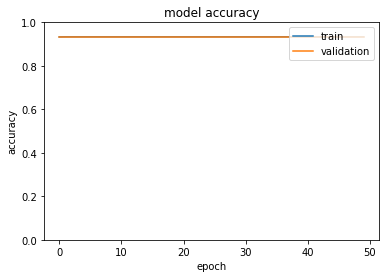

In [30]:
plot_accuracy_against_epoch(model_DNN_compile)

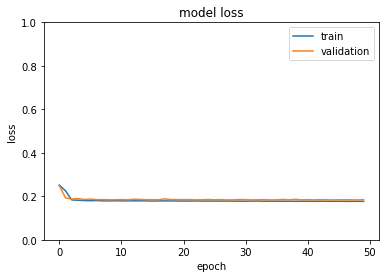

In [24]:
plot_loss_against_epoch(model_DNN_compile)

In [25]:
print(classification_report(Y_val, [np.round(pred) for pred in deep_neural_network_predict], labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97     27957
          1       0.63      0.15      0.25      2043

avg / total       0.92      0.94      0.92     30000



In [38]:
print(confusion_matrix(Y_val, [np.round(pred) for pred in deep_neural_network_predict]))

[[27777   180]
 [ 1726   317]]


6.3.6 Tuning Hyper-parameters

Tuning Hyper-parameters digunakan untuk mendapatkan hyper-parameters yang lebih baik, supaya hasil prediksi jauh lebih akurat dari sebelumnya

###### Tuning Activation Function

In [42]:
activation_functions = ['relu','sigmoid','tanh','softmax']
cvscores = []
counter = 0

for a in range(len(activation_functions)):
            #create Hyperparameters
            rand_layer_1 = 500
            rand_layer_2 = 400
            rand_layer_3 = 300
            rand_layer_4 = 200
            rand_layer_5 = 100
            value_activation = activation_functions[a]
            # create model
            model = Sequential()
            model.add(Dense(units=rand_layer_1, input_dim=X_tr.shape[1], activation=value_activation))
            model.add(Dense(units=rand_layer_2, activation=value_activation))
            model.add(Dense(units=rand_layer_3, activation=value_activation))
            model.add(Dense(units=rand_layer_4, activation=value_activation))
            model.add(Dense(units=rand_layer_5, activation=value_activation))
            model.add(Dense(Y_tr.shape[1], activation='sigmoid'))
            # Compile model
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            # Fit the model
            model.fit(X_tr, Y_tr, epochs=50, verbose=0)
            # evaluate the model
            scores = model.evaluate(X_tr, Y_tr, verbose=0)
            print("Hidden Unit 1: {0};\nHidden Unit 2: {1};\nHidden Unit 3: {2};\nHidden Unit 4: {3};\nHidden Unit 5: {4};\nActivation Function: {5};\n==> {6}"
                    .format(rand_layer_1, 
                            rand_layer_2, 
                            rand_layer_3,
                            rand_layer_4,
                            rand_layer_5,
                            value_activation,"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)))
            cvscores.append(scores[1] * 100)
            counter += 1
            print("{0}-attempt(s) with acurracy approx.: {1}"
                .format(counter, "%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores))))

Hidden Unit 1: 500;
Hidden Unit 2: 400;
Hidden Unit 3: 300;
Hidden Unit 4: 200;
Hidden Unit 5: 100;
Activation Function: relu;
==> acc: 93.76%
1-attempt(s) with acurracy approx.: 93.76% (+/- 0.00%)
Hidden Unit 1: 500;
Hidden Unit 2: 400;
Hidden Unit 3: 300;
Hidden Unit 4: 200;
Hidden Unit 5: 100;
Activation Function: sigmoid;
==> acc: 93.77%
2-attempt(s) with acurracy approx.: 93.77% (+/- 0.01%)
Hidden Unit 1: 500;
Hidden Unit 2: 400;
Hidden Unit 3: 300;
Hidden Unit 4: 200;
Hidden Unit 5: 100;
Activation Function: tanh;
==> acc: 93.35%
3-attempt(s) with acurracy approx.: 93.63% (+/- 0.20%)
Hidden Unit 1: 500;
Hidden Unit 2: 400;
Hidden Unit 3: 300;
Hidden Unit 4: 200;
Hidden Unit 5: 100;
Activation Function: softmax;
==> acc: 93.35%
4-attempt(s) with acurracy approx.: 93.56% (+/- 0.21%)


###### Tuning Learning Rate 

In [45]:
learning_rate = [1,0.1,0.01,0.001]
cvscores = []
counter = 0

for b in range(len(learning_rate)):
            #create Hyperparameters
            rand_layer_1 = 500
            rand_layer_2 = 400
            rand_layer_3 = 300
            rand_layer_4 = 200
            rand_layer_5 = 100
            value_activation = 'sigmoid'
            value_learning_rate = learning_rate[b]
            opt=Adam(lr=value_learning_rate)

            # create model
            model = Sequential()
            model.add(Dense(units=rand_layer_1, input_dim=X_tr.shape[1], activation=value_activation))
            model.add(Dense(units=rand_layer_2, activation=value_activation))
            model.add(Dense(units=rand_layer_3, activation=value_activation))
            model.add(Dense(units=rand_layer_4, activation=value_activation))
            model.add(Dense(units=rand_layer_5, activation=value_activation))
            model.add(Dense(Y_tr.shape[1], activation='sigmoid'))
            # Compile model
            model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
            # Fit the model
            model.fit(X_tr, Y_tr, epochs=50, verbose=0)
            # evaluate the model
            scores = model.evaluate(X_tr, Y_tr, verbose=0)
            print("Hidden Unit 1: {0};\nHidden Unit 2: {1};\nHidden Unit 3: {2};\nHidden Unit 4: {3};\nHidden Unit 5: {4};\nActivation Function: {5};\nLearning Rate: {6};\n==> {7}"
                    .format(rand_layer_1, 
                            rand_layer_2, 
                            rand_layer_3,
                            rand_layer_4,
                            rand_layer_5,
                            value_activation,
                            value_learning_rate,"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)))
            cvscores.append(scores[1] * 100)
            counter += 1
            print("{0}-attempt(s) with acurracy approx.: {1}"
                .format(counter, "%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores))))

Hidden Unit 1: 500;
Hidden Unit 2: 400;
Hidden Unit 3: 300;
Hidden Unit 4: 200;
Hidden Unit 5: 100;
Activation Function: sigmoid;
Learning Rate: 1;
==> acc: 93.35%
1-attempt(s) with acurracy approx.: 93.35% (+/- 0.00%)
Hidden Unit 1: 500;
Hidden Unit 2: 400;
Hidden Unit 3: 300;
Hidden Unit 4: 200;
Hidden Unit 5: 100;
Activation Function: sigmoid;
Learning Rate: 0.1;
==> acc: 93.35%
2-attempt(s) with acurracy approx.: 93.35% (+/- 0.00%)
Hidden Unit 1: 500;
Hidden Unit 2: 400;
Hidden Unit 3: 300;
Hidden Unit 4: 200;
Hidden Unit 5: 100;
Activation Function: sigmoid;
Learning Rate: 0.01;
==> acc: 93.35%
3-attempt(s) with acurracy approx.: 93.35% (+/- 0.00%)
Hidden Unit 1: 500;
Hidden Unit 2: 400;
Hidden Unit 3: 300;
Hidden Unit 4: 200;
Hidden Unit 5: 100;
Activation Function: sigmoid;
Learning Rate: 0.001;
==> acc: 93.80%
4-attempt(s) with acurracy approx.: 93.46% (+/- 0.20%)


###### Toning Epoch

In [18]:
epoch = [50,100,150,200]
cvscores = []
counter = 0

for c in range(len(epoch)):
            #create Hyperparameters
            rand_layer_1 = 500
            rand_layer_2 = 400
            rand_layer_3 = 300
            rand_layer_4 = 200
            rand_layer_5 = 100
            value_activation = 'sigmoid'
            value_learning_rate = 0.001
            value_epoch = epoch[c]
            opt=Adam(lr=value_learning_rate)
            # create model
            model = Sequential()
            model.add(Dense(units=rand_layer_1, input_dim=X_tr.shape[1], activation=value_activation))
            model.add(Dense(units=rand_layer_2, activation=value_activation))
            model.add(Dense(units=rand_layer_3, activation=value_activation))
            model.add(Dense(units=rand_layer_4, activation=value_activation))
            model.add(Dense(units=rand_layer_5, activation=value_activation))
            model.add(Dense(Y_tr.shape[1], activation='sigmoid'))
            # Compile model
            model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
            # Fit the model
            model.fit(X_tr, Y_tr, epochs=value_epoch, verbose=0)
            # evaluate the model
            scores = model.evaluate(X_tr, Y_tr, verbose=0)
            print("Hidden Unit 1: {0};\nHidden Unit 2: {1};\nHidden Unit 3: {2};\nHidden Unit 4: {3};\nHidden Unit 5: {4};\nActivation Function: {5};\nLearning Rate: {6};\nEpoch: {7};\n==> {8}"
                    .format(rand_layer_1, 
                            rand_layer_2, 
                            rand_layer_3,
                            rand_layer_4,
                            rand_layer_5,
                            value_activation,
                            value_learning_rate,
                            value_epoch,"%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)))
            cvscores.append(scores[1] * 100)
            counter += 1
            print("{0}-attempt(s) with acurracy approx.: {1}"
                .format(counter, "%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores))))

Hidden Unit 1: 500;
Hidden Unit 2: 400;
Hidden Unit 3: 300;
Hidden Unit 4: 200;
Hidden Unit 5: 100;
Activation Function: sigmoid;
Learning Rate: 0.001;
Epoch: 50;
==> acc: 93.77%
1-attempt(s) with acurracy approx.: 93.77% (+/- 0.00%)
Hidden Unit 1: 500;
Hidden Unit 2: 400;
Hidden Unit 3: 300;
Hidden Unit 4: 200;
Hidden Unit 5: 100;
Activation Function: sigmoid;
Learning Rate: 0.001;
Epoch: 100;
==> acc: 94.06%
2-attempt(s) with acurracy approx.: 93.91% (+/- 0.15%)
Hidden Unit 1: 500;
Hidden Unit 2: 400;
Hidden Unit 3: 300;
Hidden Unit 4: 200;
Hidden Unit 5: 100;
Activation Function: sigmoid;
Learning Rate: 0.001;
Epoch: 150;
==> acc: 94.95%
3-attempt(s) with acurracy approx.: 94.26% (+/- 0.50%)
Hidden Unit 1: 500;
Hidden Unit 2: 400;
Hidden Unit 3: 300;
Hidden Unit 4: 200;
Hidden Unit 5: 100;
Activation Function: sigmoid;
Learning Rate: 0.001;
Epoch: 200;
==> acc: 95.02%
4-attempt(s) with acurracy approx.: 94.45% (+/- 0.55%)


6.3.7. Create Hype-parameters after toning

In [31]:
layer_1 = 500
layer_2 = 400
layer_3 = 300
layer_4 = 200
layer_5 = 100
nilai_activation = 'sigmoid'
opt=Adam(lr=0.001)
epoch = 200
#Create layer
model_DNN = Sequential()
model_DNN.add(Dense(units=layer_1, input_dim=X_tr.shape[1], activation=nilai_activation))
model_DNN.add(Dense(units=layer_2, activation=nilai_activation))
model_DNN.add(Dense(units=layer_3, activation=nilai_activation))
model_DNN.add(Dense(units=layer_4, activation=nilai_activation))
model_DNN.add(Dense(units=layer_5, activation=nilai_activation))
model_DNN.add(Dense(Y_tr.shape[1], activation=nilai_activation))
# Compile model
model_DNN.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model_DNN_compile=model_DNN.fit(X_tr, Y_tr,batch_size= 1000, epochs=epoch, verbose=1, validation_data=(X_val, Y_val))
#Evaluated Model
scores = model_DNN.evaluate(X_val, Y_val)
print("\n%s: %.2f%%" % (model_DNN.metrics_names[1], scores[1]*100))

Train on 120000 samples, validate on 30000 samples
Epoch 1/200
120000/120000 [==============================] - 12s 104us/step - loss: 0.2521 - acc: 0.9335 - val_loss: 0.2487 - val_acc: 0.9319
Epoch 2/200
120000/120000 [==============================] - 11s 92us/step - loss: 0.2308 - acc: 0.9335 - val_loss: 0.1957 - val_acc: 0.9319
Epoch 3/200
120000/120000 [==============================] - 11s 90us/step - loss: 0.1846 - acc: 0.9340 - val_loss: 0.1927 - val_acc: 0.9331
Epoch 4/200
120000/120000 [==============================] - 11s 90us/step - loss: 0.1822 - acc: 0.9348 - val_loss: 0.1873 - val_acc: 0.9348
Epoch 5/200
120000/120000 [==============================] - 11s 92us/step - loss: 0.1803 - acc: 0.9362 - val_loss: 0.1853 - val_acc: 0.9362
Epoch 6/200
120000/120000 [==============================] - 11s 89us/step - loss: 0.1809 - acc: 0.9364 - val_loss: 0.1872 - val_acc: 0.9353
Epoch 7/200
120000/120000 [==============================] - 11s 89us/step - loss: 0.1796 - acc: 0.936

120000/120000 [==============================] - 10s 87us/step - loss: 0.1766 - acc: 0.9377 - val_loss: 0.1839 - val_acc: 0.9364
Epoch 59/200
120000/120000 [==============================] - 10s 87us/step - loss: 0.1772 - acc: 0.9376 - val_loss: 0.1841 - val_acc: 0.9357
Epoch 60/200
120000/120000 [==============================] - 10s 87us/step - loss: 0.1764 - acc: 0.9376 - val_loss: 0.1847 - val_acc: 0.9361
Epoch 61/200
120000/120000 [==============================] - 10s 87us/step - loss: 0.1765 - acc: 0.9375 - val_loss: 0.1845 - val_acc: 0.9364
Epoch 62/200
120000/120000 [==============================] - 10s 86us/step - loss: 0.1766 - acc: 0.9375 - val_loss: 0.1844 - val_acc: 0.9358
Epoch 63/200
120000/120000 [==============================] - 11s 88us/step - loss: 0.1768 - acc: 0.9375 - val_loss: 0.1842 - val_acc: 0.9361
Epoch 64/200
120000/120000 [==============================] - 10s 86us/step - loss: 0.1768 - acc: 0.9377 - val_loss: 0.1842 - val_acc: 0.9366
Epoch 65/200
120000

120000/120000 [==============================] - 11s 94us/step - loss: 0.1754 - acc: 0.9380 - val_loss: 0.1840 - val_acc: 0.9366
Epoch 116/200
120000/120000 [==============================] - 11s 94us/step - loss: 0.1752 - acc: 0.9382 - val_loss: 0.1839 - val_acc: 0.9362
Epoch 117/200
120000/120000 [==============================] - 11s 95us/step - loss: 0.1753 - acc: 0.9379 - val_loss: 0.1842 - val_acc: 0.9361
Epoch 118/200
120000/120000 [==============================] - 11s 94us/step - loss: 0.1752 - acc: 0.9380 - val_loss: 0.1838 - val_acc: 0.9364
Epoch 119/200
120000/120000 [==============================] - 11s 93us/step - loss: 0.1752 - acc: 0.9380 - val_loss: 0.1848 - val_acc: 0.9364
Epoch 120/200
120000/120000 [==============================] - 11s 92us/step - loss: 0.1752 - acc: 0.9381 - val_loss: 0.1833 - val_acc: 0.9360
Epoch 121/200
120000/120000 [==============================] - 11s 93us/step - loss: 0.1752 - acc: 0.9380 - val_loss: 0.1854 - val_acc: 0.9363
Epoch 122/200

120000/120000 [==============================] - 10s 87us/step - loss: 0.1738 - acc: 0.9386 - val_loss: 0.1851 - val_acc: 0.9354
Epoch 173/200
120000/120000 [==============================] - 11s 93us/step - loss: 0.1732 - acc: 0.9388 - val_loss: 0.1845 - val_acc: 0.9365
Epoch 174/200
120000/120000 [==============================] - 12s 97us/step - loss: 0.1731 - acc: 0.9389 - val_loss: 0.1851 - val_acc: 0.9356
Epoch 175/200
120000/120000 [==============================] - 11s 90us/step - loss: 0.1735 - acc: 0.9387 - val_loss: 0.1851 - val_acc: 0.9360
Epoch 176/200
120000/120000 [==============================] - 11s 93us/step - loss: 0.1732 - acc: 0.9388 - val_loss: 0.1851 - val_acc: 0.9357
Epoch 177/200
120000/120000 [==============================] - 11s 91us/step - loss: 0.1729 - acc: 0.9389 - val_loss: 0.1854 - val_acc: 0.9362
Epoch 178/200
120000/120000 [==============================] - 13s 106us/step - loss: 0.1726 - acc: 0.9390 - val_loss: 0.1861 - val_acc: 0.9355
Epoch 179/20

In [47]:
dnn_predict_with_tuning_hyperparameters = model_DNN.predict(X_val)
predict_validation = pd.DataFrame(dnn_predict_with_tuning_hyperparameters)
print("Tenth predict validation after tuning hyper-parameters : ")
predict_validation.head(10)

Tenth predict validation after tuning hyper-parameters : 


,0
0,0.012570
1,0.025313
2,0.017281
3,0.028360
4,0.068669
5,0.044931
6,0.024690
7,0.014795
8,0.008886
9,0.068951


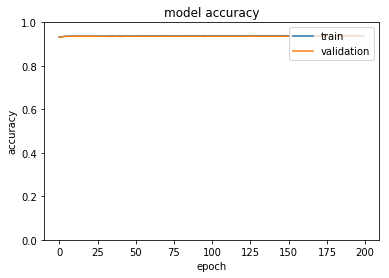

In [40]:
plot_accuracy_against_epoch(model_DNN_compile)

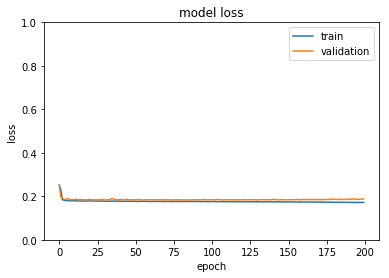

In [41]:
plot_loss_against_epoch(model_DNN_compile)

In [42]:
print(classification_report(Y_val, [np.round(pred) for pred in dnn_predict_with_tuning_hyperparameters], labels=[0, 1]))

             precision    recall  f1-score   support

          0       0.94      0.99      0.97     27957
          1       0.60      0.16      0.25      2043

avg / total       0.92      0.94      0.92     30000



In [49]:
predict = pd.DataFrame(model_DNN.predict(independent_variabel_data_test))
print('Tenth data predict :')
predict.head(10)

Tenth data predict :


,0
0,0.056217
1,0.048616
2,0.010041
3,0.048885
4,0.075639
5,0.023909
6,0.025062
7,0.029128
8,0.003262
9,0.385999


In [50]:
predict['Id'] = range(1, len(predict) + 1)
predict['probability'] = predict.iloc[:,[0]]
predict = predict.iloc[:,1:]
predict.to_csv('C:/Users/Wahyu Nainggolan/Documents/ronde 2/ronde_2/Data/predict_result.csv', index = False)